In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV 

In [2]:
df=pd.read_csv("C:/Users/SRIRAM PRASATH/Downloads/Car details v3.csv")

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [12]:
lable=LabelEncoder()
df['mileage']=label.fit_transform(df['mileage'])

In [15]:
lable=LabelEncoder()
df['engine']=label.fit_transform(df['engine'])

In [16]:
lable=LabelEncoder()
df['max_power']=label.fit_transform(df['max_power'])

In [17]:
lable=LabelEncoder()
df['torque']=label.fit_transform(df['torque'])

In [18]:
lable=LabelEncoder()
df['seats']=label.fit_transform(df['seats'])

In [21]:
lable=LabelEncoder()
df['fuel']=label.fit_transform(df['fuel'])

In [23]:
lable=LabelEncoder()
df['seller_type']=label.fit_transform(df['seller_type'])

In [24]:
lable=LabelEncoder()
df['transmission']=label.fit_transform(df['transmission'])

In [25]:

lable=LabelEncoder()
df['owner']=label.fit_transform(df['owner'])


C:\Users\SRIRAM PRASATH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SRIRAM PRASATH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SRIRAM PRASATH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SRIRAM PRASATH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

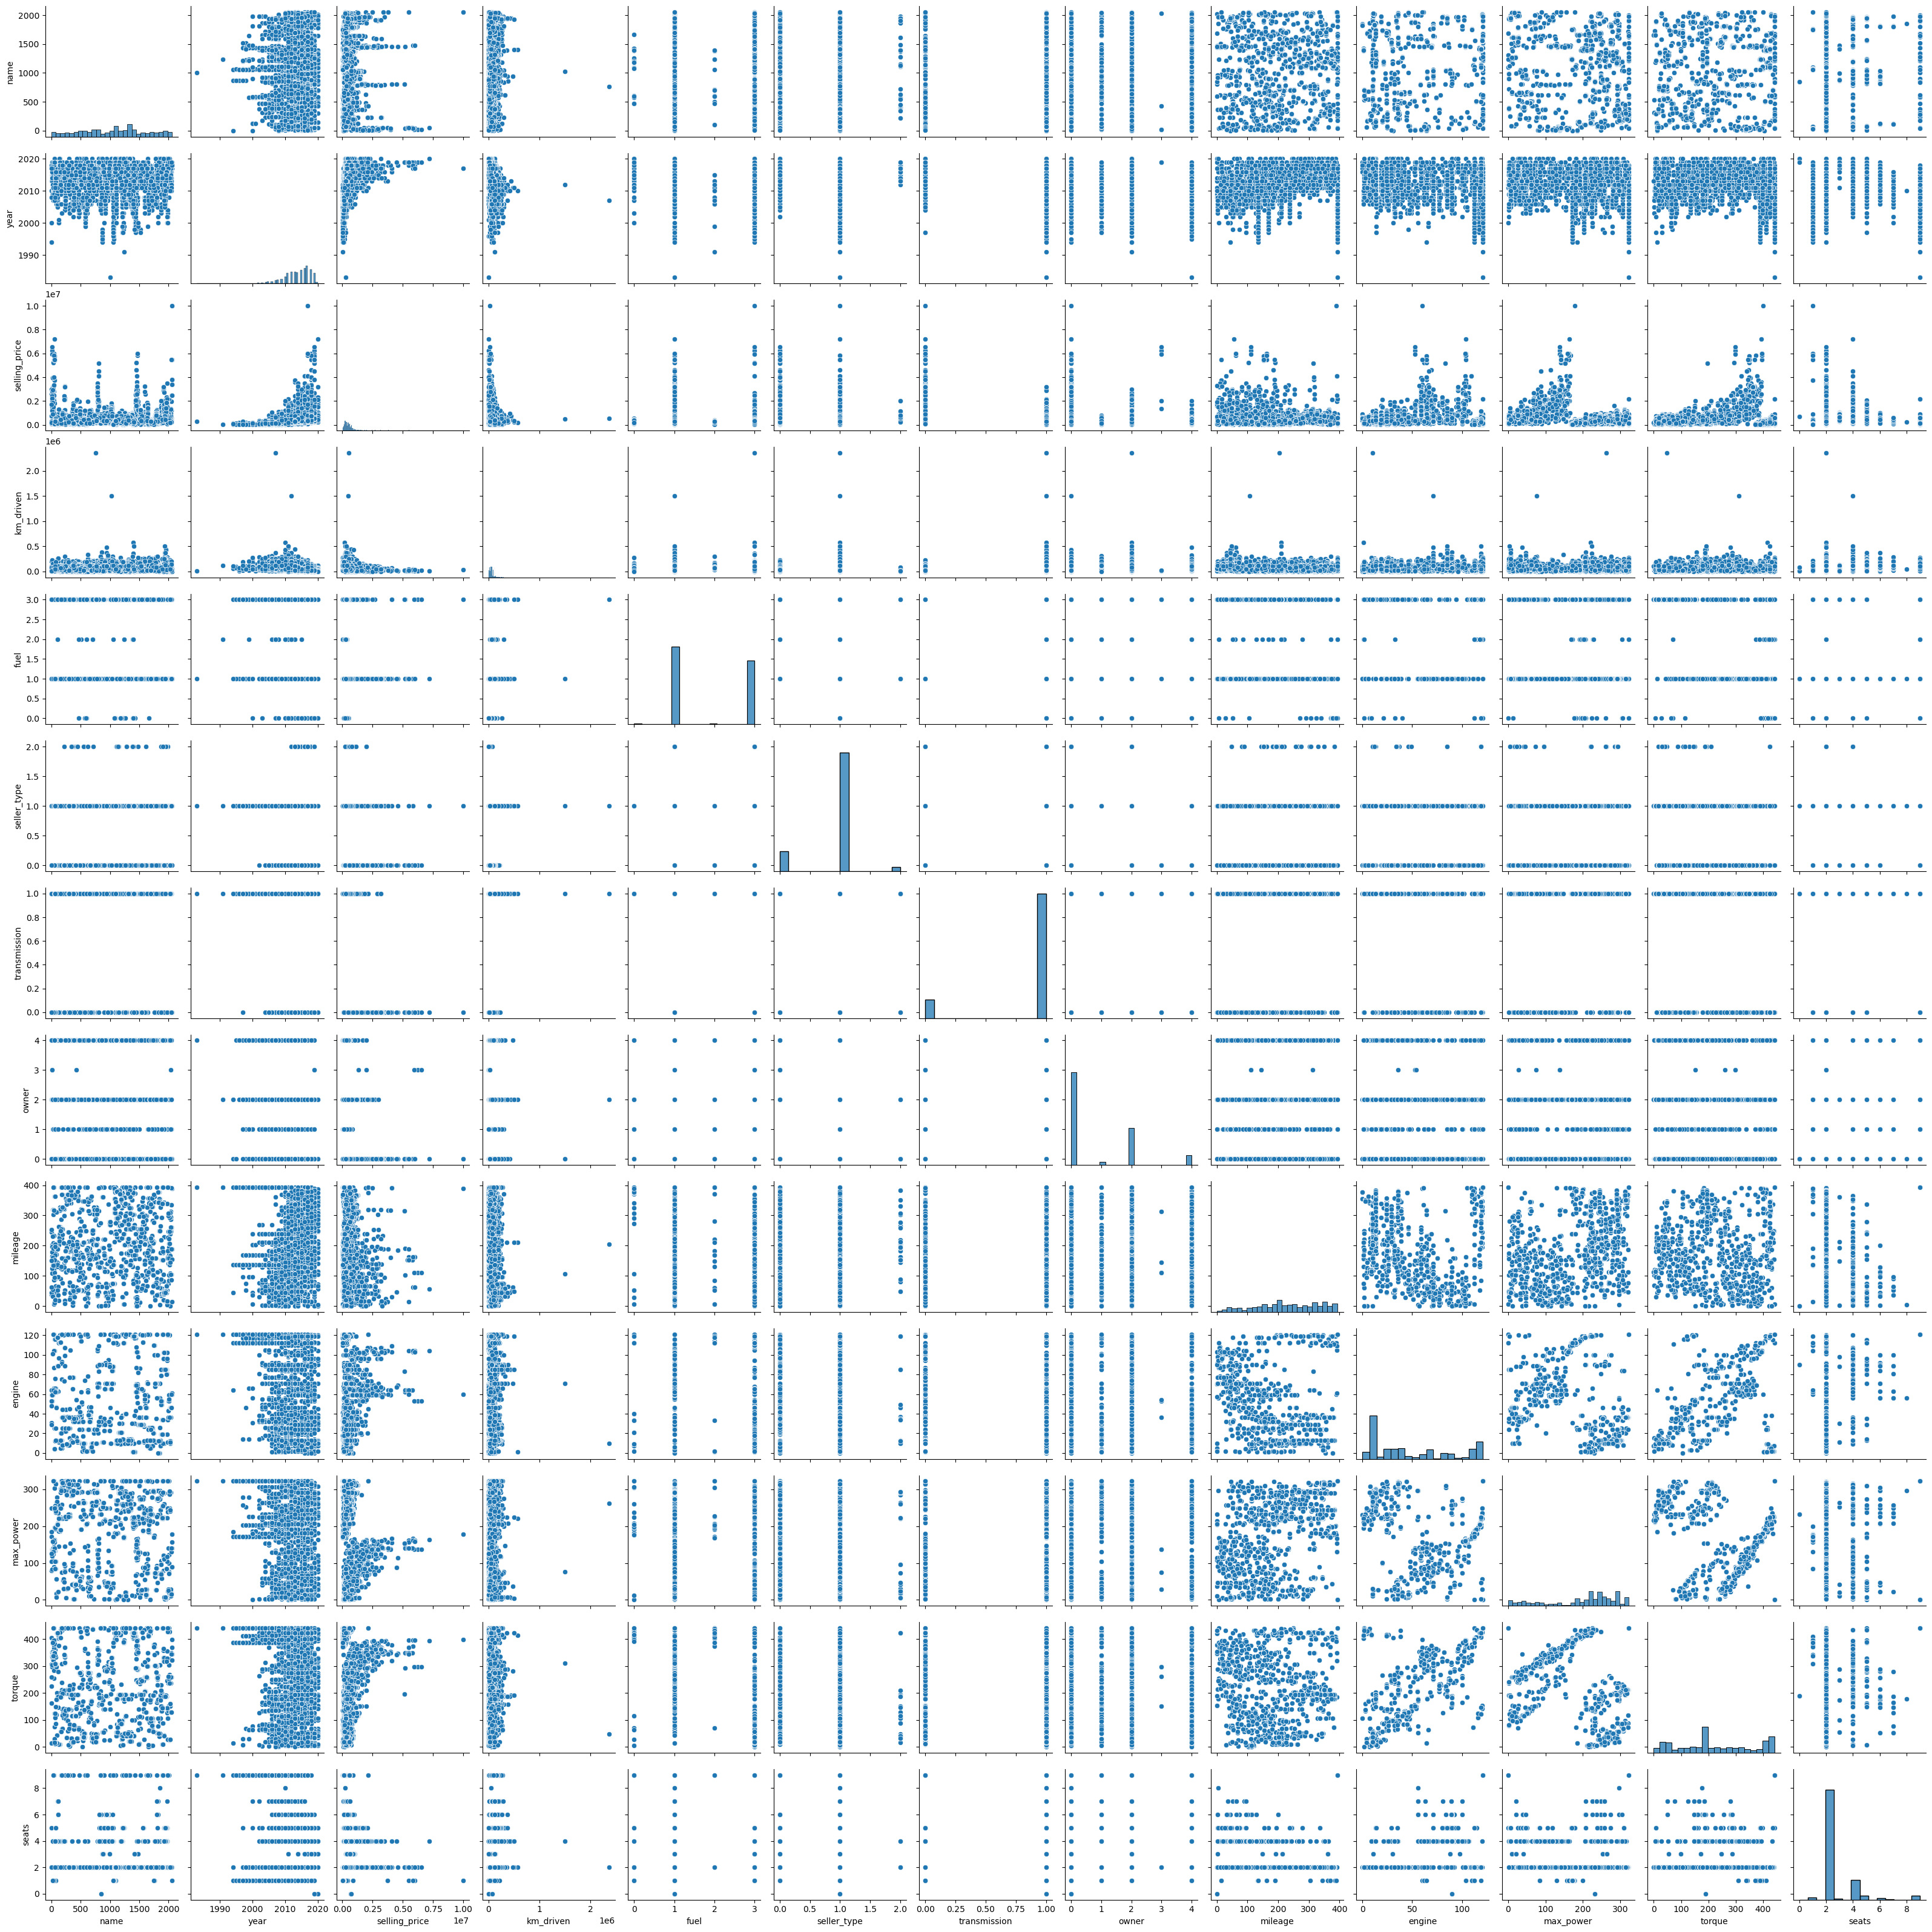

In [26]:
sns.pairplot(df)

In [27]:
df.corr()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
name,1.000000,-0.029481,-0.072100,0.096240,-0.100340,0.101781,0.032814,0.007591,-0.037509,0.075183,-0.154006,0.072433,0.089994
year,-0.029481,1.000000,0.414092,-0.418006,-0.050312,-0.146042,-0.244707,-0.477249,0.230438,-0.234559,0.025882,-0.187572,-0.202993
selling_price,-0.072100,0.414092,1.000000,-0.225534,-0.194029,-0.335857,-0.588845,-0.229174,-0.143479,0.054660,-0.231122,0.106644,-0.036417
km_driven,0.096240,-0.418006,-0.225534,1.000000,-0.265877,0.122105,0.201229,0.280340,-0.160111,0.044196,-0.087734,0.020503,0.199147
fuel,-0.100340,-0.050312,-0.194029,-0.265877,1.000000,0.110512,-0.035255,-0.022339,-0.040158,0.119566,0.152099,-0.058585,-0.209936
seller_type,0.101781,-0.146042,-0.335857,0.122105,0.110512,1.000000,0.227871,0.143443,-0.011154,0.023600,0.068853,-0.050468,0.042214
transmission,0.032814,-0.244707,-0.588845,0.201229,-0.035255,0.227871,1.000000,0.147458,0.167900,-0.053138,0.209237,-0.050896,0.081087
owner,0.007591,-0.477249,-0.229174,0.280340,-0.022339,0.143443,0.147458,1.000000,-0.123550,0.083877,-0.040682,0.082066,0.107216
mileage,-0.037509,0.230438,-0.143479,-0.160111,-0.040158,-0.011154,0.167900,-0.123550,1.000000,-0.117360,0.518157,0.078642,-0.110795
engine,0.075183,-0.234559,0.054660,0.044196,0.119566,0.023600,-0.053138,0.083877,-0.117360,1.000000,-0.277625,0.732812,0.356530


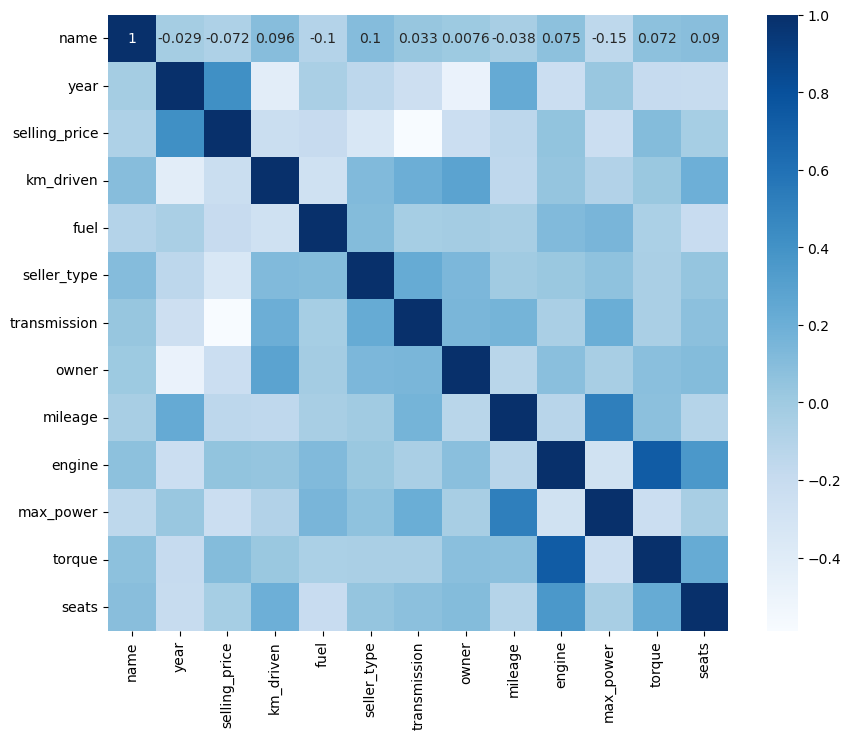

In [28]:
a=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(a,annot=True, cmap='Blues')
plt.show()

In [36]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [37]:
x

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,1307,2014,450000,145500,1,1,1,0,335,13,244,178
1,1607,2014,370000,120000,1,1,1,2,284,36,15,260
2,385,2006,158000,140000,3,1,1,4,180,35,253,66
3,781,2010,225000,127000,1,1,1,0,327,24,297,224
4,1349,2007,130000,120000,3,1,1,0,136,14,288,21
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,771,2013,320000,110000,3,1,1,0,202,10,267,37
8124,656,2007,135000,119000,1,1,1,1,154,32,30,250
8125,1319,2009,382000,120000,1,1,1,0,222,13,241,178
8126,1699,2013,290000,25000,1,1,1,0,337,24,232,106


In [38]:
y

0       2
1       2
2       2
3       2
4       2
       ..
8123    2
8124    2
8125    2
8126    2
8127    2
Name: seats, Length: 8128, dtype: int64

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [40]:
x_train.shape,x_test.shape

((6502, 12), (1626, 12))

In [41]:
regressor=DecisionTreeRegressor()

In [42]:
param_grid={
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [43]:
grid_search=GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)

C:\Users\SRIRAM PRASATH\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\SRIRAM PRASATH\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\SRIRAM PRASATH\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\SRIRAM PRASATH\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [47]:
y_pred=best_regressor.predict(x_test)

In [48]:
best_regressor=grid_search.best_estimator_
best_regressor.fit(x_train,y_train)

C:\Users\SRIRAM PRASATH\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='auto')

In [49]:
y_pred=best_regressor.predict(x_test)

In [50]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.857041540911646


In [51]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

0.3186758390519401


In [52]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [53]:
grid_search=GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [54]:
y_pred=best_regressor.predict(x_test)

In [55]:
best_regressor=grid_search.best_estimator_
best_regressor.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9, min_samples_split=5)

In [56]:
y_pred=best_regressor.predict(x_test)

In [57]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.9290613707206717


In [58]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

0.15813284048349166
